# Проект: Статистический анализ данных

Проведем статистический анализ для популярного сервиса аренды самокатов GoFast. Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь популярному сервису аренды самокатов GoFast вырасти, о них поговорим чуть позже.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:


- без подписки абонентская плата отсутствует;
1) стоимость одной минуты поездки — 8 рублей;
2) стоимость старта (начала поездки) — 50 рублей;


- с подпиской Ultra

1) абонентская плата — 199 рублей в месяц;
2) стоимость одной минуты поездки — 6 рублей;
3) стоимость старта — бесплатно.


- Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


1) Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Будем использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Нужно проверить то, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 


3) Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 


4) Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Здесь нужно выяснить следующее: какой тест нам понадобился бы для проверки этой гипотезы?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
from math import factorial
from math import sqrt

#### Шаг 1. Загрузка данных

##### Считаем CSV-файлы

In [2]:
data_users = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_3\\users_go.csv')

In [3]:
data_rides = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_3\\rides_go.csv')

In [4]:
data_subscriptions = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_3\\subscriptions_go.csv')

##### Рассмотрим первые строки каждого набора данных и изучим общую информацию о каждом датафрейме.

In [5]:
def data_first_view(data):
    # Вывод первых 10 строк
    print("Первые 10 строк данных:")
    display(data.head(10))
    print('*' * 50)
    
    # Информация о данных
    print("\nИнформация о данных:")
    print(data.info())
    display('*' * 50)
    
    # Имена столбцов
    print("\nИмена столбцов:")
    print(data.columns)
    display('*' * 50)
    
    # Описательная статистика
    print("\nОписательная статистика:")
    print(data.describe())
    display('*' * 50)
    
    # Количество пропущенных значений
    print("\nКоличество пропущенных значений в каждом столбце:")
    print(data.isna().sum())
    display('*' * 50)
    
    # Количество дубликатов
    print("\nКоличество дубликатов:")
    display(data.duplicated().sum())

###### Датафрейм, содержащий информацию о пользователях 'data_users'

In [6]:
data_first_view(data_users)

Первые 10 строк данных:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


'**************************************************'


Имена столбцов:
Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')


'**************************************************'


Описательная статистика:
           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


'**************************************************'


Количество пропущенных значений в каждом столбце:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


'**************************************************'


Количество дубликатов:


31

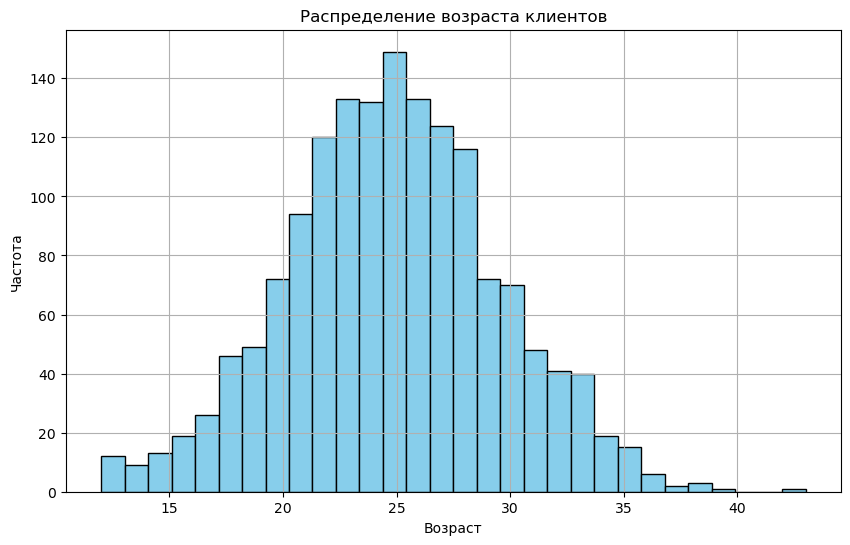

In [7]:
plt.figure(figsize=(10, 6))

plt.hist(data_users['age'], bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')

plt.show()

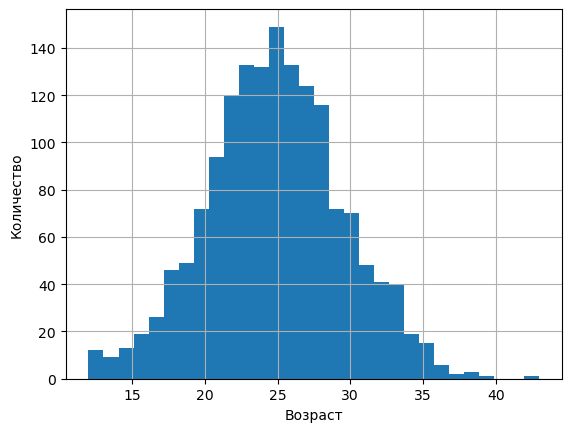

In [8]:
data_users['age'].hist(bins=30)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [9]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В ходе ознакомления с датафреймом **users_data**, который содержит информацию о пользователях всего в таблице 1565 записей, проблем в виде пропусков, неверных типов данных и аномальных значений не было выявлено, но присутствуют явные дубликаты, с которыми будем разбираться во время предобработки данных. Названия столбцов также выглядят корректно. Также отметим, что представляют собой столбцы датафрейма.

- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

###### Датафрейм, содержащий информацию о поездках пользователей 'data_rides'.

In [10]:
data_first_view(data_rides)

Первые 10 строк данных:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


'**************************************************'


Имена столбцов:
Index(['user_id', 'distance', 'duration', 'date'], dtype='object')


'**************************************************'


Описательная статистика:
            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


'**************************************************'


Количество пропущенных значений в каждом столбце:
user_id     0
distance    0
duration    0
date        0
dtype: int64


'**************************************************'


Количество дубликатов:


0

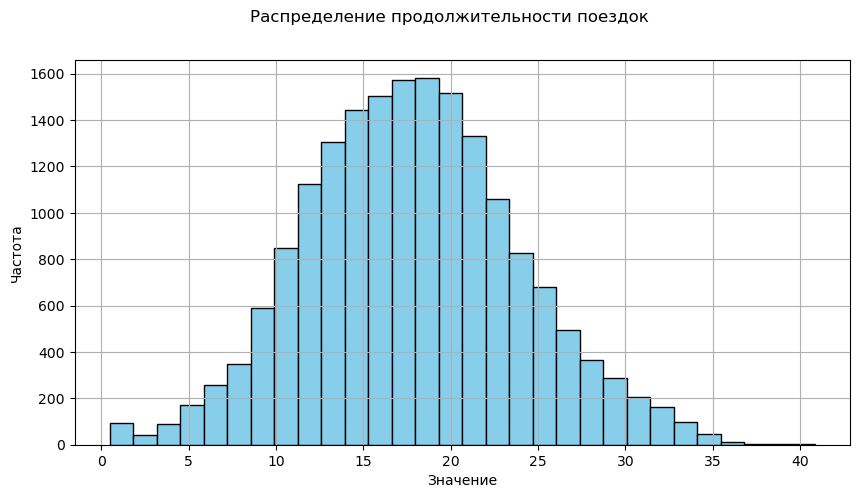

In [11]:
data_rides['duration'].hist(bins=30, figsize=(10, 5), color='skyblue', edgecolor='black')


plt.suptitle('Распределение продолжительности поездок')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

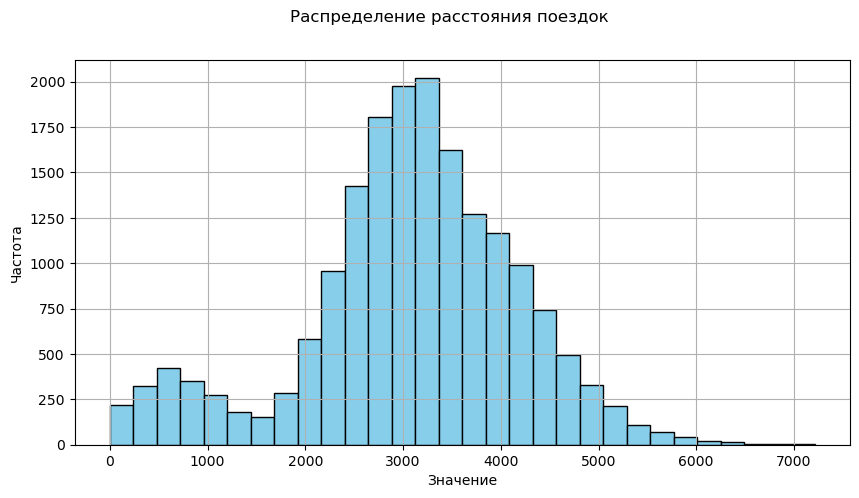

In [12]:
data_rides['distance'].hist(bins=30, figsize=(10, 5), color='skyblue', edgecolor='black')


plt.suptitle('Распределение расстояния поездок')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

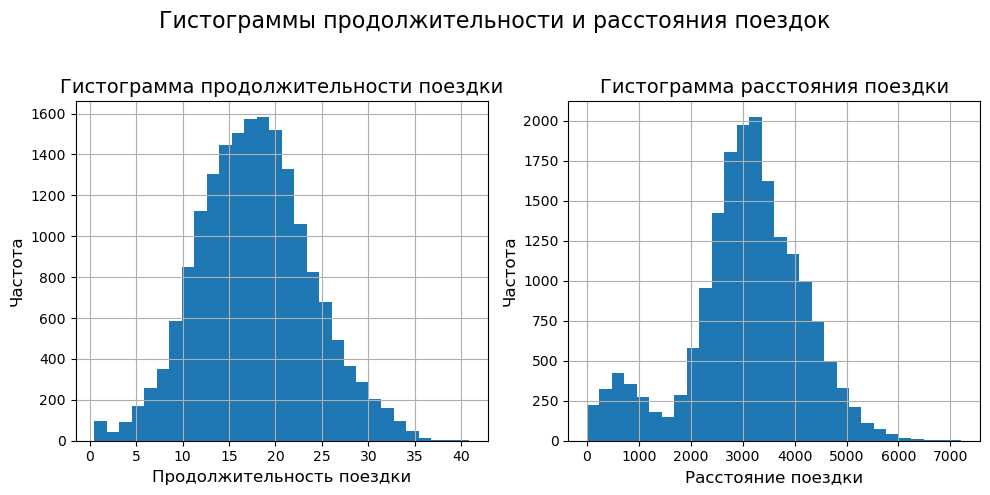

In [13]:
ax = data_rides[['duration', 'distance']].hist(bins=30, figsize=(10, 5))

plt.suptitle('Гистограммы продолжительности и расстояния поездок', fontsize=16)


ax[0][0].set_xlabel('Продолжительность поездки', fontsize=12)
ax[0][0].set_ylabel('Частота', fontsize=12)
ax[0][0].set_title('Гистограмма продолжительности поездки', fontsize=14)


ax[0][1].set_xlabel('Расстояние поездки', fontsize=12)
ax[0][1].set_ylabel('Частота', fontsize=12)
ax[0][1].set_title('Гистограмма расстояния поездки', fontsize=14)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Датафрейм **data_rides**, содержащий информацию о поездках пользователей содержит 18068 запией. Пропусков данных нет, названия столбцов корректное, однако, стоит обратить внимание на тип данных столбца **date**, который представлен в виде object, а должен иметь тип **datetime**. Отмечу что собой представляет каждый столбце в данном датафрейме.

- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

###### Датафрейм, содержащий информацию о типе  подписки 'data_subscriptions'.

In [14]:
data_first_view(data_subscriptions)

Первые 10 строк данных:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None


'**************************************************'


Имена столбцов:
Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')


'**************************************************'


Описательная статистика:
       minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0.000000
25%        6.500000         12.500000         49.750000
50%        7.000000         25.000000         99.500000
75%        7.500000         37.500000        149.250000
max        8.000000         50.000000        199.000000


'**************************************************'


Количество пропущенных значений в каждом столбце:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


'**************************************************'


Количество дубликатов:


0

Датафрейм **data_subscriptions** содержит всего 2 записи, которые хранят информацию о типе подписки. Пропусков нет, названия столбцов корректные, типы данных соответствуют. Также стоит отразить информацию о столбцах.

- subscription_type - тип подписки (нет или подписка 'ultra')
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа


**Промежуточный вывод по шагу 1**

В ходе ознакомления с датафреймом **users_data**, который содержит информацию о пользователях всего в таблице 1565 записей, проблем в виде пропусков, неверных типов данных и аномальных значений не было выявлено, но присутствуют явные дубликаты.

Датафрейм **data_rides**, содержащий информацию о поездках пользователей содержит 18068 запией. Пропусков данных нет, названия столбцов корректное, однако, стоит обратить внимание на тип данных столбца date, который представлен в виде object, а должен иметь тип datetime.

Датафрейм **data_subscriptions** содержит всего 2 записи, которые хранят информацию о типе подписки. Пропусков нет, названия столбцов корректные, типы данных соответствуют.

#### Шаг 2. Предобработка данных

##### Приведем столбце date к типу даты pandas

In [15]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [16]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создадим новый столбец с номером месяца на основе столбца date

In [17]:
data_rides['month'] = data_rides['date'].dt.month

In [18]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [19]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Пропущенные значения и дубликаты

Пропущенных значений не было выявлено в датафреймах, но **data_users** содержит 31 явный дубликат, которые будут удалены.

In [20]:
data_users.duplicated().sum()

31

In [21]:
data_users.drop_duplicates(inplace=True)

In [22]:
data_users.duplicated().sum()

0

**Промежуточный вывод по шагу 2**

В ходе предобработки данных я привел столбец **date** к типу данных, который должен соответсвовать типу datetime. Также был создан новый столбец **month**, который содержит номер месяца. На первом шаге были замечены явные дубликаты в датафрейме **data_users**, которые были успешны удалены.  

#### Шаг 3. Исследовательский анализ данных

##### Общая информация о частоте встречаемости городов

In [23]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

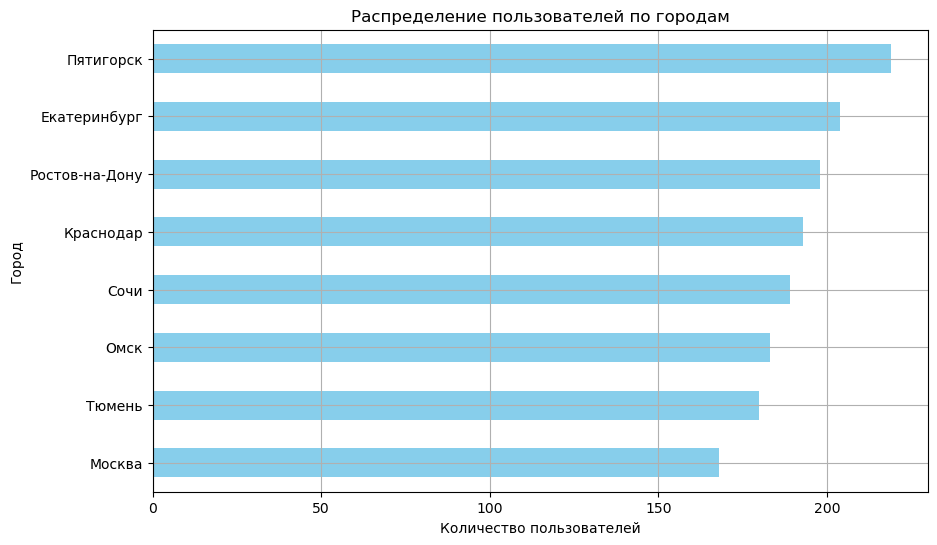

In [24]:
data_users['city'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue', grid=True)

plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

plt.show()


Из представленной информации можно сделать вывод о том, что сервис самокатов представлен в 8 городах. Наибольшее количество пользователей находится в Пятигорске (219 человек), а наименьшее в Москве (168 человек).

##### Общая информация о соотношении пользователей с подпиской и без.

In [25]:
data_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

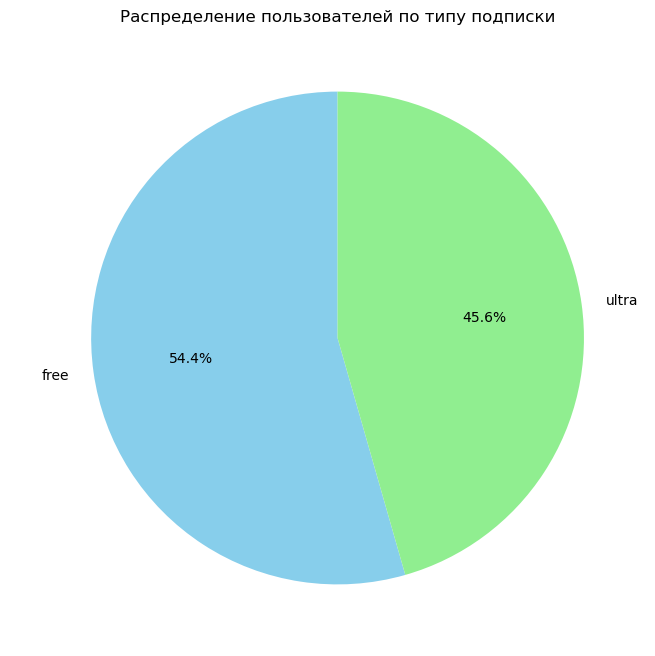

In [26]:
# Построение круговой диаграммы
data_users['subscription_type'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Добавление заголовка
plt.title('Распределение пользователей по типу подписки')
plt.ylabel(' ')

plt.show()


Больше пользователей, которые не имеют подписки, их количество равно 835 (54,4 %), пользователей с подпиской немного меньше и их количество равно 699 (45,6%).

##### Общая информация о возрасте пользователей

In [27]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<Axes: >

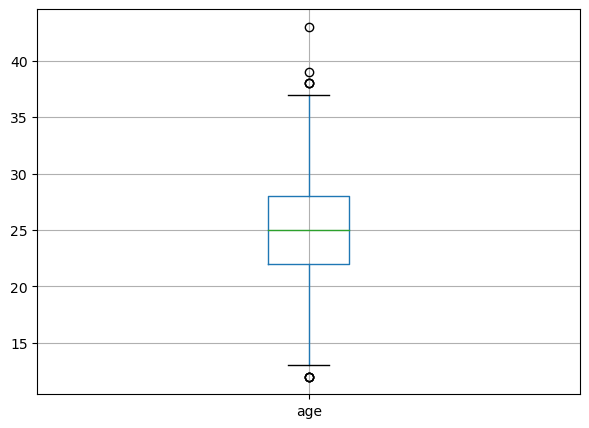

In [28]:
data_users.boxplot('age', grid=True, figsize=(7, 5))

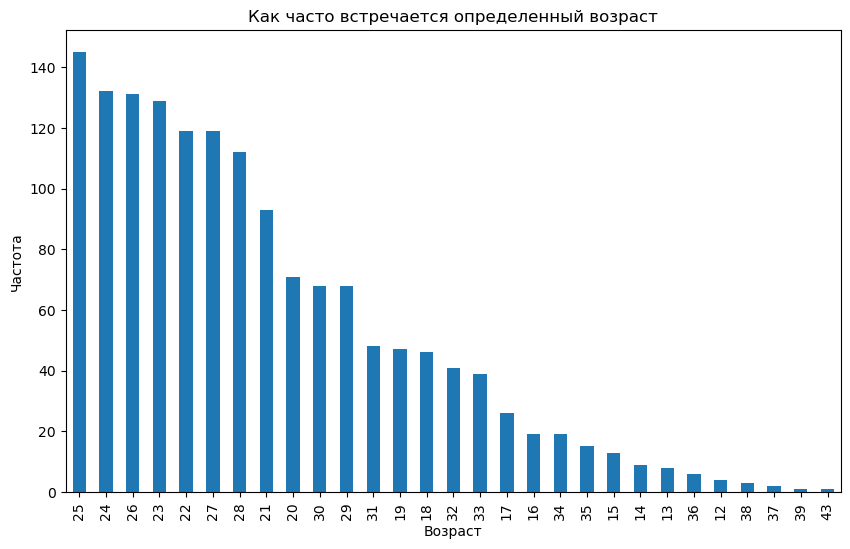

In [29]:
data_users['age'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Как часто встречается определенный возраст')
plt.xlabel('Возраст')
plt.ylabel('Частота')

plt.show()

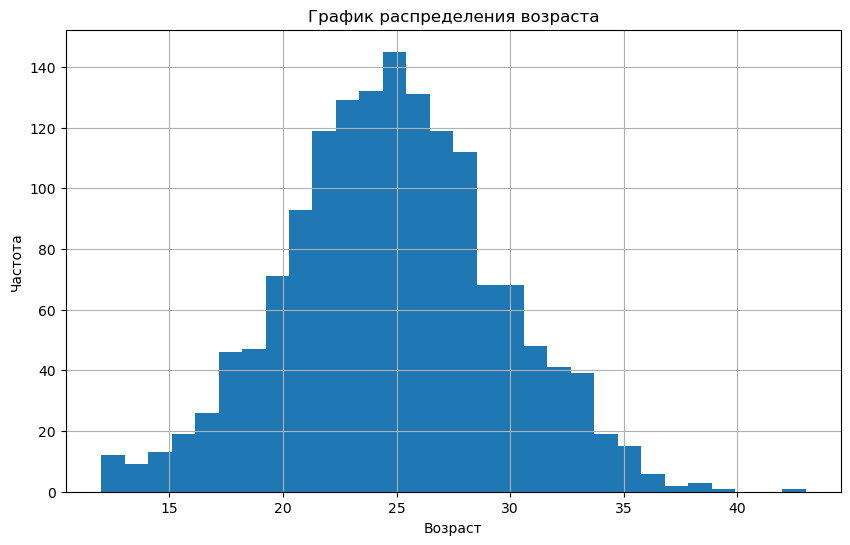

In [30]:
data_users['age'].hist(bins=30, grid=True, figsize=(10, 6))
plt.title('График распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Согласно правилам:

В возрасте от 7 до 14 лет на электросамокатах можно ездить по пешеходным и велосипедным дорожкам, тротуарам и в пределах пешеходных зон. Там же могут передвигаться дети младше 7 лет, но только в сопровождении взрослых.

Если говорить о возрасте пользователей, то минимальный возраст пользователя равен 12 годам, максимальный 43. Средний возраст пользователей равен 25. Наибольшее количество пользователей находится в диапазоне от 20 до 30 лет. 

##### Общая информация о расстоянии, которое пользователь преодолел за одну поездку.

In [31]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

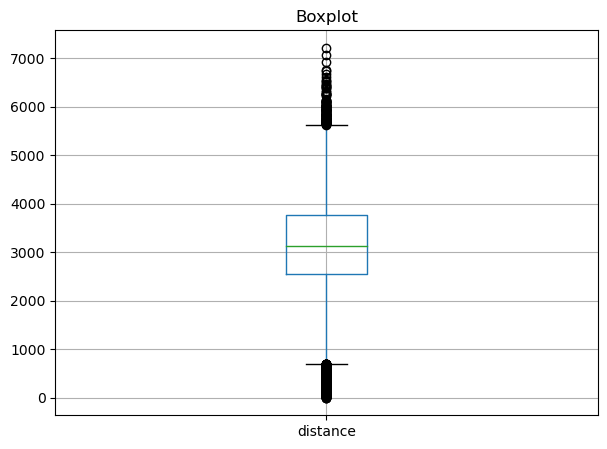

In [32]:
data_rides.boxplot('distance', grid=True, figsize=(7, 5))
plt.title('Boxplot')
plt.show()

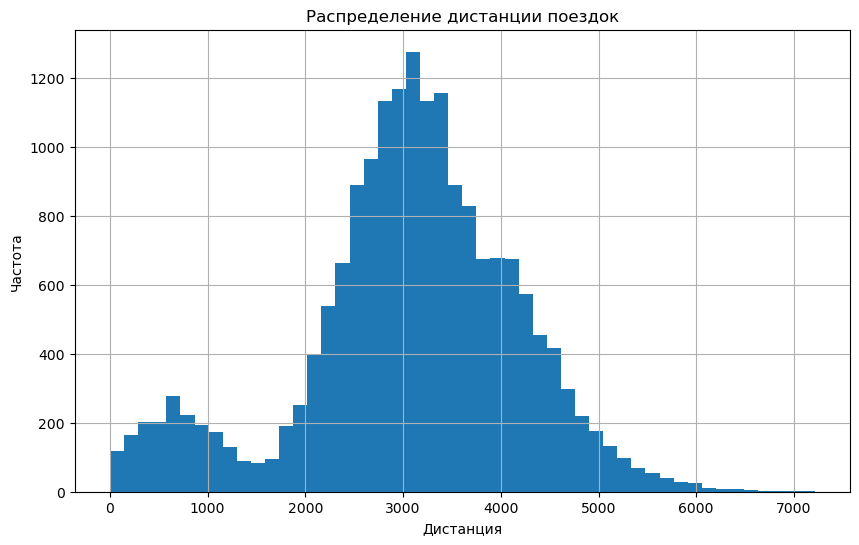

In [33]:
data_rides['distance'].plot(kind='hist', bins=50, grid=True, figsize=(10, 6))

plt.title('Распределение дистанции поездок')
plt.xlabel('Дистанция')
plt.ylabel('Частота')

plt.show()

По описанию данных можно сказать, что минимальное расстояние поездки около 1 метра (возможно пользователь передумал ехать, так как мимо проезжал автобус), а максимальное 7211 метров. В среднем пользователи проезжали 3070,69 метра. Мода равна 3133,22 метрам. 

На графике видим два пика. Первый пик от 0 до 1500 метров, это характерно коротким поездкам,но их не большинство. Второй пик от 1500 до 6000 метров, в этом диапазоне находится большинство поездок. Для более глубокого анализа нужно рассматривать сезонность и другие факторы.

##### Общая информация о продолжительности поездки

In [34]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

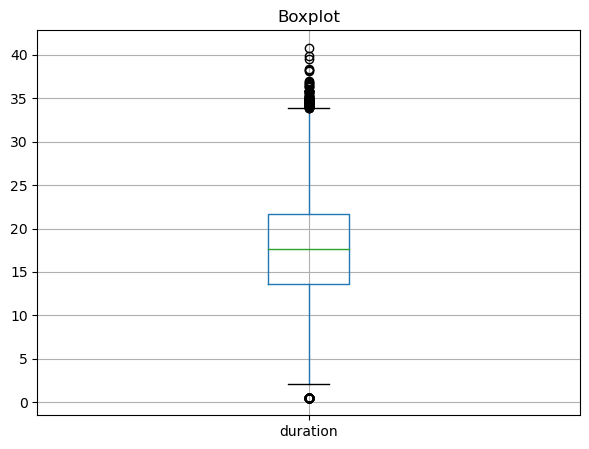

In [35]:
data_rides.boxplot('duration', grid=True, figsize=(7, 5))
plt.title('Boxplot')
plt.show()

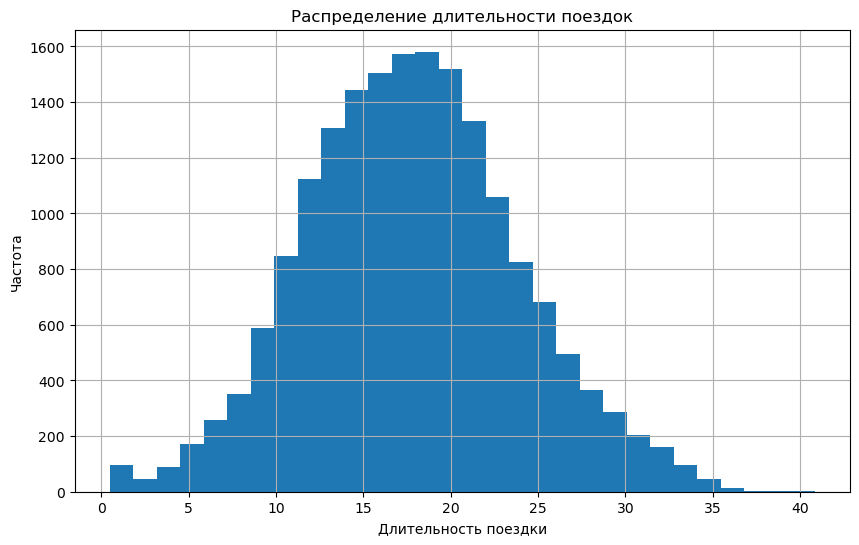

In [36]:
data_rides['duration'].plot(kind='hist', bins=30, grid=True, figsize=(10, 6))

plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')

plt.show()

Максимальная продолжительность поездки равна 41 минуте, а минимальная 0,5 минут (или 30 секунд). В среднем сессия длилась около 18 минут. Большинство значений расположились в пределе от 10 до 25 минут.

Попробуем разобраться с поездками, которые длились меньше минуты.

In [37]:
short_rides = data_rides[data_rides['duration'] < 1]

In [38]:
data_first_view(short_rides)

Первые 10 строк данных:


,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 6531 to 17909
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   95 non-null     int64         
 1   distance  95 non-null     float64       
 2   duration  95 non-null     float64       
 3   date      95 non-null     datetime64[ns]
 4   month     95 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 4.1 KB
None


'**************************************************'


Имена столбцов:
Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')


'**************************************************'


Описательная статистика:
           user_id     distance  duration                           date  \
count    95.000000    95.000000      95.0                             95   
mean   1092.210526  5113.176549       0.5  2021-07-01 13:53:41.052631552   
min     701.000000  4030.308008       0.5            2021-01-05 00:00:00   
25%     901.000000  4611.510820       0.5            2021-03-16 00:00:00   
50%    1069.000000  5052.769411       0.5            2021-06-18 00:00:00   
75%    1310.500000  5488.459099       0.5            2021-10-18 12:00:00   
max    1524.000000  7211.007745       0.5            2021-12-27 00:00:00   
std     244.028551   658.254104       0.0                            NaN   

           month  
count  95.000000  
mean    6.484211  
min     1.000000  
25%     3.000000  
50%     6.000000  
75%    10.000000  
max    12.000000  
std     3.709858  


'**************************************************'


Количество пропущенных значений в каждом столбце:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


'**************************************************'


Количество дубликатов:


0

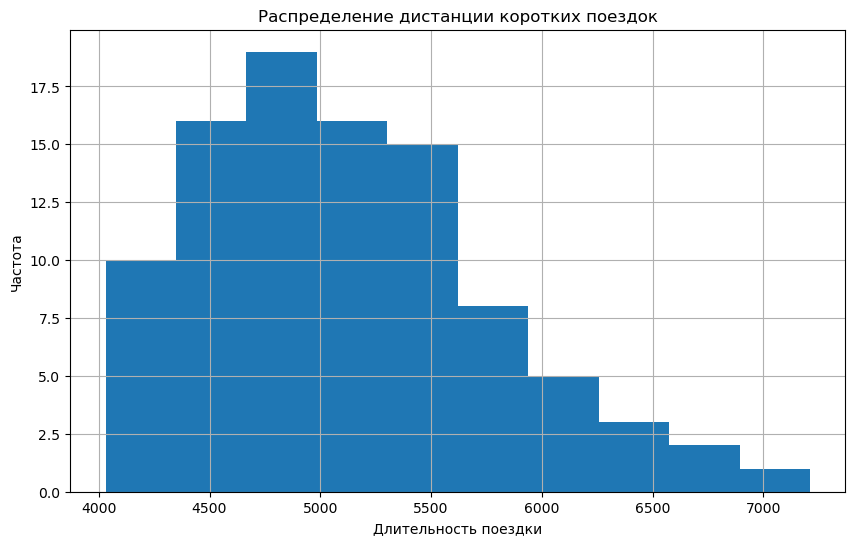

In [39]:
short_rides['distance'].plot(kind='hist', bins=10, grid=True, figsize=(10, 6))

plt.title('Распределение дистанции коротких поездок')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')

plt.show()

Видим, что для поездок, которые длились меньше минуты, характерно слишком большое расстояние (от 4 км. до 7 км.). Такая ситуация могла сложиться из-за:

1) Технических проблем: Возможно, некорректно зарегистрированные данные о времени начала и окончания поездки, либо о длительности поездки.

2) Ошибок в измерениях: Возможно, в процессе записи данных произошли ошибки при измерении расстояния или времени поездки.

3) Мошенничества: Некоторые пользователи могли пытаться обойти систему, создавая поездки с неправдоподобными параметрами, чтобы получить какие-то выгоды или преимущества.

**Промежуточный вывод по разделу 3**

В данном разделе была описана и визуализирована общая информация о пользователях и поездках. 

- Сервис самокатов представлен в 8 городах. Наибольшее количество пользователей находится в Пятигорске (219 человек), а наименьшее в Москве (168 человек).


- Больше пользователей, которые не имеют подписки, их количество равно 835, пользователей с подпиской немного меньше и их количество равно 699.


- Если говорить о возрасте пользователей, то минимальный возраст пользователя равен 12 годам, максимальный 43. Средний возраст пользователей равен 25. Наибольшее количество пользователей находится в диапазоне от 20 до 30 лет.


- Минимальное расстояние поездки около 1 метра (возможно пользователь передумал ехать, так как мимо проезжал автобус), а максимальное 7211 метров. В среднем пользователи проезжали 3070,69 метра. Мода равна 3133,22 метрам.


- Максимальная продолжительность поездки равна 41 минуте, а минимальная 0,5 минут (или 30 секунд). В среднем сессия длилась около 18 минут. Большинство значений расположились в пределе от 10 до 25 минут.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [40]:
data_merge = data_users.merge(data_rides, on='user_id').merge(data_subscriptions, on='subscription_type')

In [41]:
data_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<div class="alert alert-info"> <b>Комментарий студента:</b> Округлим столбец duration</div>

In [42]:
data_merge['duration'] = np.ceil(data_merge['duration'])

In [43]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Молодец, что проверяешь корректность размера датасета после объединения 
* Проверка пропусков также замечательна и страхует от возможных ошибок    

In [44]:
data_merge.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [45]:
data_merge.describe()

,user_id,age,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,18.303520,2021-06-30 19:47:21.266327296,6.486772,7.280496,32.012398,71.590658
min,1.000000,12.000000,0.855683,1.000000,2021-01-01 00:00:00,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,14.000000,2021-04-02 00:00:00,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,18.000000,2021-06-30 00:00:00,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,22.000000,2021-09-28 00:00:00,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,41.000000,2021-12-30 00:00:00,12.000000,8.000000,50.000000,199.000000
std,434.734317,4.582216,1116.831209,6.094928,NaN,3.437410,0.959882,23.997045,95.508238


В объединенном датафрейме получилось 18063 записи, пропусков нет. 

##### Создадим два датафрейма из шага 4.1

###### Датафрейм с информацией о пользователях без подписки

In [46]:
data_free_sub = data_merge[data_merge['subscription_type'] == 'free']

In [47]:
data_free_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


In [48]:
data_free_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [49]:
data_free_sub.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Датафрейм с информацией о пользователях без подписки содержит 11568 записей, пропусков нет.

###### Датафрейм с информацией о пользователях с подпиской

In [50]:
data_ultra_sub = data_merge[data_merge['subscription_type'] == 'ultra']

In [51]:
data_ultra_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [52]:
data_ultra_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


In [53]:
data_ultra_sub.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В датафрейме с информацией о пользователях с подпиской 6500 записей, пропусков нет.

In [54]:
len(data_free_sub) + len(data_ultra_sub)

18068

Видим, что сумма записей из полученных датафреймов соответствует общему количеству записей data_merge. 

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

###### Расстояние и время для пользователей без подписки

In [55]:
data_free_sub['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

<Axes: >

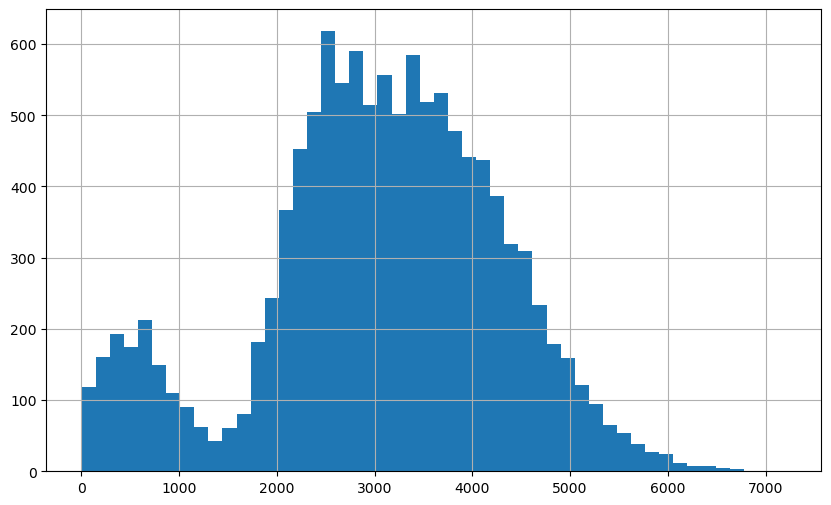

In [56]:
data_free_sub['distance'].hist(bins=50, grid=True, figsize=(10, 6))

In [57]:
# Проверка количества уникальных пользователей
unique_users_before_merge = data_users['user_id'].nunique()
unique_users_after_merge = data_merge['user_id'].nunique()

if unique_users_before_merge == unique_users_after_merge:
    print("Количество уникальных пользователей в объединенной таблице соответствует ожиданиям.")
else:
    print("Количество уникальных пользователей в объединенной таблице НЕ соответствует ожиданиям.")

# Проверка на наличие пропусков
if data_merge.isnull().values.any():
    print("Обнаружены пропуски в объединенной таблице.")
else:
    print("Пропусков в объединенной таблице нет.")

Количество уникальных пользователей в объединенной таблице соответствует ожиданиям.
Пропусков в объединенной таблице нет.


In [58]:
data_free_sub['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

<Axes: >

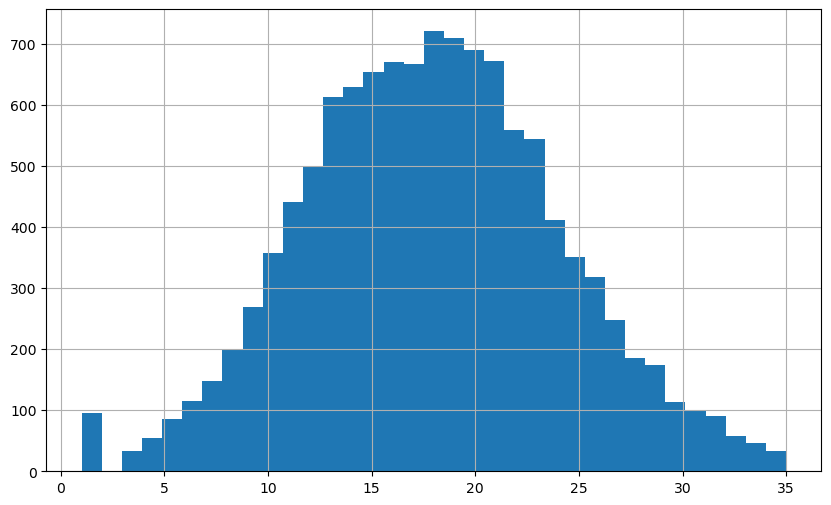

In [59]:
data_free_sub['duration'].hist(bins=35, grid=True, figsize=(10, 6))

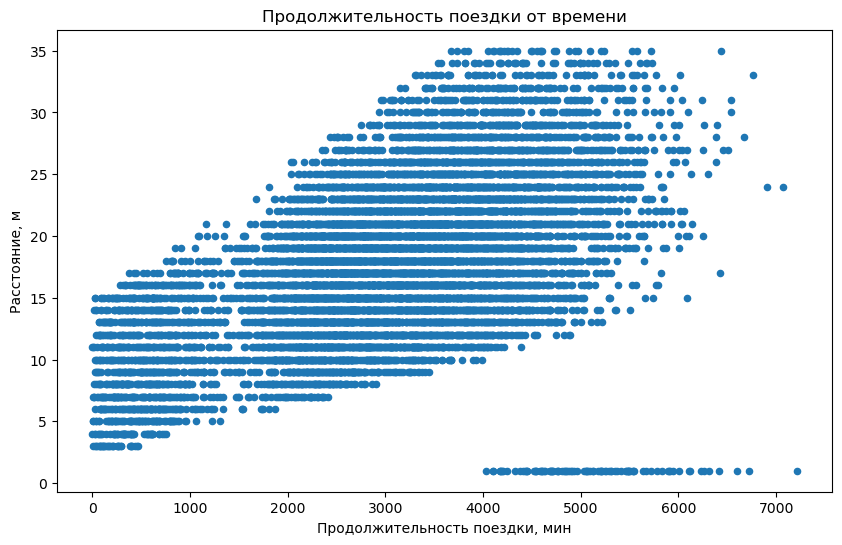

In [60]:
data_free_sub.plot(x='distance', y='duration', kind='scatter', figsize=(10, 6))
plt.title("Продолжительность поездки от времени")
plt.xlabel("Продолжительность поездки, мин")
plt.ylabel("Расстояние, м")
plt.show()

Минимальное расстояние для пользователей без подписки равно 0,8 метра, максимальное 7211 метров. В среднем они проезжают 3045 метров. Минимальная длительность поездки 30 секунд (0.5 мин.), максимальная 35 минут, в среднем сессия длится 17 минут. 


###### Расстояние и время для пользователей с подпиской

In [61]:
data_ultra_sub['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

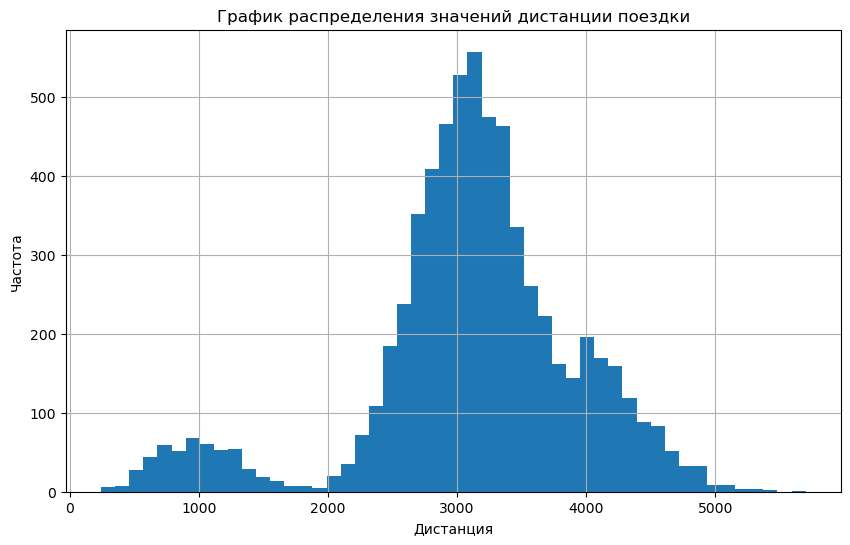

In [87]:
data_ultra_sub['distance'].hist(bins=50, grid=True, figsize=(10, 6))
plt.title('График распределения значений дистанции поездки')
plt.xlabel('Дистанция')
plt.ylabel('Частота')
plt.show()

In [88]:
data_ultra_sub['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

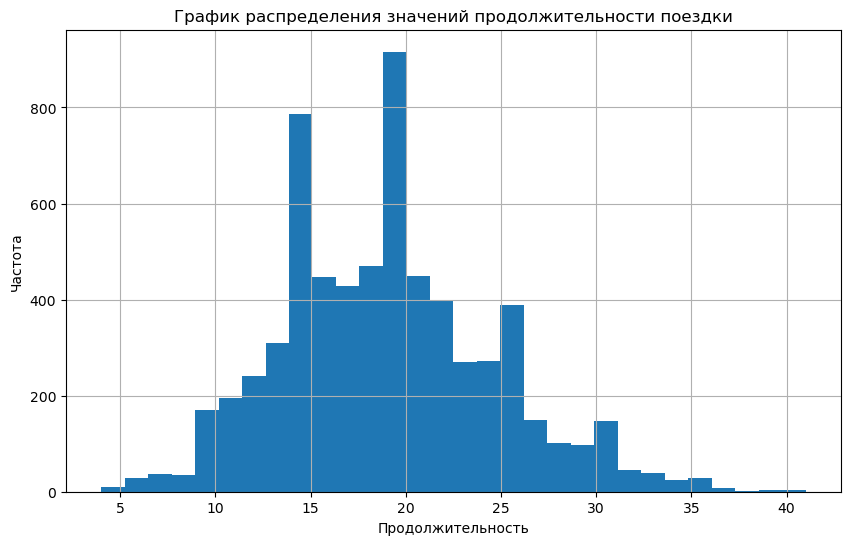

In [91]:
data_ultra_sub['duration'].hist(bins=30, grid=True, figsize=(10, 6))
plt.title('График распределения значений продолжительности поездки')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()

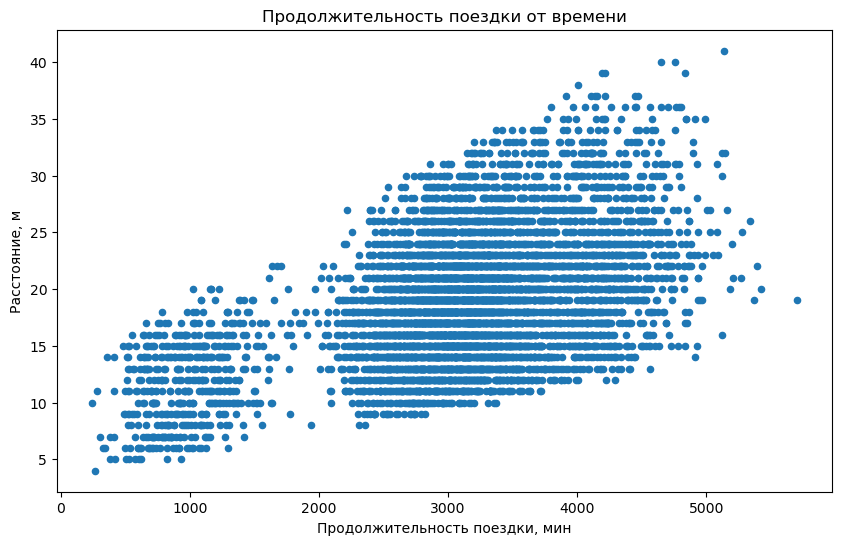

In [65]:
data_ultra_sub.plot(x='distance', y='duration', kind='scatter', figsize=(10, 6))
plt.title("Продолжительность поездки от времени")
plt.xlabel("Продолжительность поездки, мин")
plt.ylabel("Расстояние, м")
plt.show()

Минимальное расстояние для пользователей с подпиской равно 244 метра, максимальное 5699 метров. В среднем они проезжают 3115 метров. Минимальная длительность поездки 4 минуты, максимальная 41 минута, в среднем сессия длится 18 минут.

По диаграмме рассеяния видим, что пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской. Пользователи с подпиской имеют более длительные сессии, чем пользователи без подписки. Также стоит отметить, что пользователи без подписки имеют большое количество коротких поездок с длинными сессиями. Возможно, это связано с тем, что пользователи с подпиской более опытны и используют самокат ежедневно, а пользователи без подписки только знакомятся с способом передвижения.

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Промежуточный вывод по шагу 4**

- На этом шаге я объединил данные о пользователях, поездках и подписках в один датафрейм, в объединенном датафрейме получилось 18063 записи, пропуски не обнаружены.

- Затем на основе объединенного датафрейма была создана таблица с информацией о пользователях без подписки, которая  содержит 11568 записей, пропусков в ней нет. Также была создана таблица с информацией о пользователях с подпиской, в которой получилось 6500 записей, пропусков в ней нет.

- В конце была визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.

1) Минимальное расстояние для пользователей без подписки равно 0,8 метра, максимальное 7211 метров. В среднем они проезжают 3045 метров. Минимальная длительность поездки 30 секунд (0.5 мин.), максимальная 35 минут, в среднем сессия длится 17 минут.


2) Минимальное расстояние для пользователей с подпиской равно 244 метра, максимальное 5699 метров. В среднем они проезжают 3115 метров. Минимальная длительность поездки 4 минуты, максимальная 41 минута, в среднем сессия длится 18 минут.


3) Пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской. Пользователи с подпиской имеют более длительные сессии, чем пользователи без подписки. Также стоит отметить, что пользователи без подписки имеют большое количество коротких поездок с длинными сессиями. Возможно, это связано с тем, что пользователи с подпиской более опытны и используют самокат ежедневно, а пользователи без подписки только знакомятся с способом передвижения.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм data_useres_month  с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [66]:
data_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [67]:
data_users_month = (data_merge
                     .pivot_table(index=('user_id', 'month'), 
                                  values=('distance', 'duration', 'date','minute_price', 'start_ride_price', 'subscription_fee'), 
                                  aggfunc={'distance': 'sum',
                                          'duration': 'sum',
                                          'date': 'count',
                                          'minute_price': 'first',
                                          'start_ride_price': 'first',
                                          'subscription_fee': 'first'}))

In [92]:
data_first_view(data_users_month)

Первые 10 строк данных:


rides  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2   7027.511294          42.0             6   
        4          1    754.159807           7.0             6   
        8          2   6723.470560          46.0             6   
        10         2   5809.911100          32.0             6   
        11         3   7003.499363          56.0             6   
        12         2   6751.629942          28.0             6   
2       3          3  10187.723006          63.0             6   
        4          2   6164.381824          40.0             6   
        6          1   3255.338202          14.0             6   
        7          2   6780.722964          48.0             6   

               start_ride_price  subscription_fee  user_revenue  
user_id month                                                    
1       1                     0               199         451.0  
        4                     0               199         241.0  
        8                     0               199         475.0  
        10                    0               199         391.0  
        11                    0               199         535.0  
        12                    0               199         367.0  
2       3                     0               199         577.0  
        4                     0               199         439.0  
        6                     0               199         283.0  
        7                     0               199         487.0

**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rides             11331 non-null  int64  
 1   distance_sum      11331 non-null  float64
 2   duration_sum      11331 non-null  float64
 3   minute_price      11331 non-null  int64  
 4   start_ride_price  11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
 6   user_revenue      11331 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 665.0 KB
None


'**************************************************'


Имена столбцов:
Index(['rides', 'distance_sum', 'duration_sum', 'minute_price',
       'start_ride_price', 'subscription_fee', 'user_revenue'],
      dtype='object')


'**************************************************'


Описательная статистика:
              rides  distance_sum  duration_sum  minute_price  \
count  11331.000000  11331.000000  11331.000000  11331.000000   
mean       1.594564   4896.362584     29.186127      7.199894   
std        0.831604   2911.516556     16.752464      0.979861   
min        1.000000      2.570787      1.000000      6.000000   
25%        1.000000   2972.202146     17.000000      6.000000   
50%        1.000000   3988.723985     24.000000      8.000000   
75%        2.000000   6421.375890     38.000000      8.000000   
max        7.000000  23429.487786    143.000000      8.000000   

       start_ride_price  subscription_fee  user_revenue  
count      11331.000000      11331.000000  11331.000000  
mean          29.997352         79.610537    342.303504  
std           24.496519         97.496144    153.875346  
min            0.000000          0.000000     58.000000  
25%            0.000000          0.000000    234.000000  
50%           50.000000          0.00000

'**************************************************'


Количество пропущенных значений в каждом столбце:
rides               0
distance_sum        0
duration_sum        0
minute_price        0
start_ride_price    0
subscription_fee    0
user_revenue        0
dtype: int64


'**************************************************'


Количество дубликатов:


0

In [71]:
data_users_month.columns = ['rides', 'distance_sum', 'duration_sum', 'minute_price', 'start_ride_price', 'subscription_fee']

In [72]:
data_users_month

rides  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2   7027.511294          42.0             6   
        4          1    754.159807           7.0             6   
        8          2   6723.470560          46.0             6   
        10         2   5809.911100          32.0             6   
        11         3   7003.499363          56.0             6   
...              ...           ...           ...           ...   
1534    6          2   3409.468534          26.0             8   
        8          2   7622.453034          48.0             8   
        9          1   4928.173852          23.0             8   
        11         4  13350.015305          78.0             8   
        12         1   2371.711192          16.0             8   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
...                         ...               ...  
1534    6                    50                 0  
        8                    50                 0  
        9                    50                 0  
        11                   50                 0  
        12                   50                 0  

[11331 rows x 6 columns]

##### Округлим продолжительность каждой поездки в каждой строке исходного датафрейма до следующего числа 

In [74]:
data_users_month.head()

rides  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2   7027.511294          42.0             6   
        4          1    754.159807           7.0             6   
        8          2   6723.470560          46.0             6   
        10         2   5809.911100          32.0             6   
        11         3   7003.499363          56.0             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

Выручка = Количество поездок * Стоимость старта поездки + Стоимость минуты * Общая продолжительность поездок + Стоимость подписки 

In [75]:
data_users_month['user_revenue'] = (data_users_month['rides'] * data_users_month['start_ride_price'] + 
                                    data_users_month['minute_price'] * data_users_month['duration_sum'] +
                                    data_users_month['subscription_fee'])

In [76]:
data_users_month.head()

rides  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2   7027.511294          42.0             6   
        4          1    754.159807           7.0             6   
        8          2   6723.470560          46.0             6   
        10         2   5809.911100          32.0             6   
        11         3   7003.499363          56.0             6   

               start_ride_price  subscription_fee  user_revenue  
user_id month                                                    
1       1                     0               199         451.0  
        4                     0               199         241.0  
        8                     0               199         475.0  
        10                    0               199         391.0  
        11                    0               199         535.0

In [77]:
data_users_month.isna().sum()

rides               0
distance_sum        0
duration_sum        0
minute_price        0
start_ride_price    0
subscription_fee    0
user_revenue        0
dtype: int64

**Промежуточный вывод по шагу 5**

- В этом разделе был создан датафрейм data_useres_month с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Также было найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


- Был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Выручка рассчитывалась как: **Количество поездок * Стоимость старта поездки + Стоимость минуты * Общая продолжительность поездок + Стоимость подписки**. Но перед этим я округлил продолжительность каждой поездки до следующего числа.


#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

**H0** - Пользователи с подпиской и без тратят время на поездку одинаково


**H1** - Пользователи с подпиской дольше находятся в пути

In [79]:
alpha = 0.05

results_hyp1 = st.ttest_ind(data_free_sub['duration'], data_ultra_sub['duration'], alternative='less')

print('p-значение:', results_hyp1.pvalue)

if results_hyp1.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Полученное p-значение (2.5) гораздо меньше заданного уровня значимости (alpha = 0.05), поэтому мы отвергаем нулевую гипотезу о том, что пользователи с подпиской и без тратят время на поездку одинаково. Это значит, что есть статистически значимые доказательства того, что пользователи с подпиской проводят в пути больше времени, чем пользователи без подписки. Это может свидетельствовать о том, что пользователи с подпиской действительно могут быть выгоднее для компании, так как они готовы больше времени проводить в поездках.

#####  Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

**H0** - Пользователи с подпиской в среднем проезжют 3130 метров.


**H1** - Пользователи с подпиской в среднем проезжают более 3130 метров.

In [80]:
optimal_value = 3130

alpha = 0.05

results_hyp2 = st.ttest_1samp(data_ultra_sub['distance'], optimal_value,alternative='greater')

print('p-значение:', results_hyp2.pvalue)

if results_hyp2.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


На основании полученного p-значения (0.9195), мы не можем отвергнуть нулевую гипотезу (H0). Это означает, что нет статистически значимого доказательства того, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

#####  Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**H0** - Выручка от пользователей с подпиской и без неё равна.

**H1** - Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [81]:
ultra_revenue = data_users_month[data_users_month['subscription_fee'] > 0]

In [82]:
free_revenue = data_users_month[data_users_month['subscription_fee'] == 0]

In [84]:
alpha = 0.05

results_hyp3 = st.ttest_ind(ultra_revenue['user_revenue'], free_revenue['user_revenue'], alternative='greater')

print('p-значение:', results_hyp3.pvalue)

if results_hyp3.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное p-значение (1.89) значительно меньше заданного уровня значимости (alpha = 0.05), что позволяет нам отвергнуть нулевую гипотезу о равенстве выручки от пользователей с подпиской и без неё. Таким образом, у нас есть статистические доказательства в пользу альтернативной гипотезы: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае представлена парная выборка, это означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем случае это пара измерения количества обращений в техподдержку - до и после обновления серверов, с которыми взаимодействует мобильное приложение. Поэтому нам понадобится **scipy_stats_ttest_rel()** c параметром **alternative = 'less'**, так как нас интересует снижение обращений.

**Промежуточный вывод по шагу 6**

Перед тем как продакт-менеджерам сервиса проводить различные акции, чтобы увеличить количество пользователей с подпиской, нам было необходимо выяснить несколько важных моментов.

1) Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. В ходе проверки этой гипотезы было выявлено следующее: Полученное p-значение (2.5) гораздо меньше заданного уровня значимости (alpha = 0.05), поэтому мы отвергаем нулевую гипотезу о том, что пользователи с подпиской и без тратят время на поездку одинаково. Это значит, что есть статистически значимые доказательства того, что пользователи с подпиской проводят в пути больше времени, чем пользователи без подписки. Это может свидетельствовать о том, что пользователи с подпиской действительно могут быть выгоднее для компании, так как они готовы больше времени проводить в поездках.

2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверяя эту гипотезу, на основании полученного p-значения (0.9195), мы не можем отвергнуть нулевую гипотезу (H0). Это означает, что нет статистически значимого доказательства того, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

3) Проверили гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Полученное p-значение (1.89) значительно меньше заданного уровня значимости (alpha = 0.05), что позволяет нам отвергнуть нулевую гипотезу о равенстве выручки от пользователей с подпиской и без неё. Таким образом, у нас есть статистические доказательства в пользу альтернативной гипотезы: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

4) В заключении была рассмотрена теоритическая гипотеза о том, что техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Был дан ответ на вопрос о том "какой тест вам понадобился бы для проверки этой гипотезы?" В данном случае представлена парная выборка, это означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем случае это пара измерения количества обращений в техподдержку - до и после обновления серверов, с которыми взаимодействует мобильное приложение. Поэтому нам понадобится scipy_stats_ttest_rel() c параметром alternative = 'less', так как нас интересует снижение обращений.

#### Шаг 7. Распределения

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = 0.15372


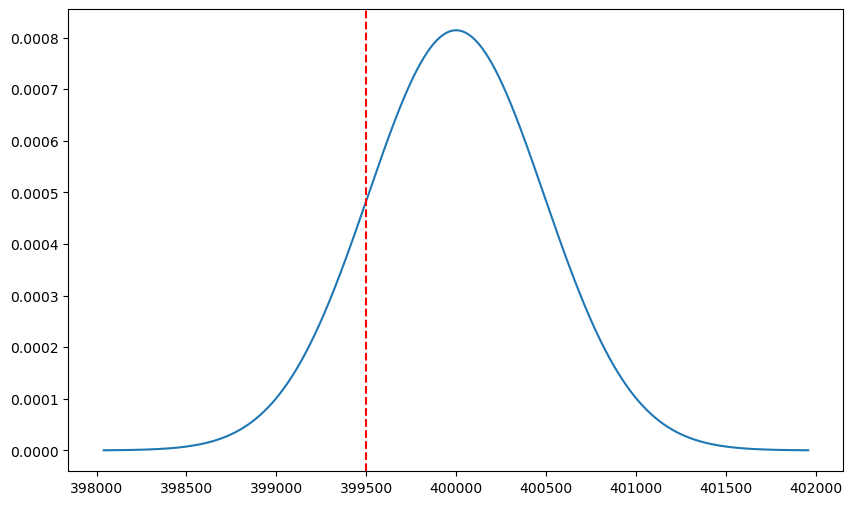

In [85]:
# зададим параметры 
n = 1000000  # общее количество испытаний
p = 0.40     # вероятность успеха в каждом испытании
target = 399500  # значение, для которого мы хотим посчитать вероятность

# вычисляем среднее (математическое ожидание) и стандартное отклонение
mu = n * p
sigma = sqrt(n * p * (1 - p))

# создаем объект нормального распределения для аппроксимации биномиального распределения
distr = st.norm(mu, sigma)

# вычисляем вероятность левого хвоста
result = round(distr.cdf(target), 5)

print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = {result}')

# определяем границы для оси x, чтобы график был читаемым
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)

# список значений по оси x для построения графика
x = list(range(max(0, left), right))

# построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, st.binom.pmf(x, n, p))  
plt.axvline(target, color='r', linestyle='--') # вертикальная линия на график

plt.show()

**Общий вывод**

Мне были предоставлены данные о пользователях, поездках и типах подписки популярного сервиса аренды самокатов GoFast. 

- В таблице, которая содержит информацию о пользователях, всего в таблице 1565 записей, проблем в виде пропусков, неверных типов данных и аномальных значений не было выявлено.


- Таблица, содержащая информацию о поездках пользователей, содержит 18068 запией. Пропусков данных нет, названия столбцов корректное.


- Таблица с информацией о подпискаъ содержит всего 2 записи. Пропусков нет, названия столбцов корректные, типы данных соответствуют.


В ходе проекта были выполнены следующие шаги:


1) Была описана и визуализирована общая информация о пользователях и поездках.


- Сервис самокатов представлен в 8 городах. Наибольшее количество пользователей находится в Пятигорске (219 человек), а наименьшее в Москве (168 человек).


- Больше пользователей, которые не имеют подписки, их количество равно 835, пользователей с подпиской немного меньше и их количество равно 699.


- Если говорить о возрасте пользователей, то минимальный возраст пользователя равен 12 годам, максимальный 43. Средний возраст пользователей равен 25. Наибольшее количество пользователей находится в диапазоне от 20 до 30 лет.


- Минимальное расстояние поездки около 1 метра (возможно пользователь передумал ехать, так как мимо проезжал автобус), а максимальное 7211 метров. В среднем пользователи проезжали 3070,69 метра. Мода равна 3133,22 метрам.


- Максимальная продолжительность поездки равна 41 минуте, а минимальная 0,5 минут (или 30 секунд). В среднем сессия длилась около 18 минут. Большинство значений расположились в пределе от 10 до 25 минут.


2) Затем я объединил данные о пользователях, поездках и подписках в один датафрейм, на основе которого были созданы таблицы с информацией о пользователях без подписки, которая содержит 11568 записей, и с подпиской, в которой получилось 6500 записей. С их помощью были выявлены следующие особенности:


- Минимальное расстояние для пользователей без подписки равно 0,8 метра, максимальное 7211 метров. В среднем они проезжают 3045 метров. Минимальная длительность поездки 30 секунд (0.5 мин.), максимальная 35 минут, в среднем сессия длится 17 минут.


- Минимальное расстояние для пользователей с подпиской равно 244 метра, максимальное 5699 метров. В среднем они проезжают 3115 метров. Минимальная длительность поездки 4 минуты, максимальная 41 минута, в среднем сессия длится 18 минут.


- Пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской. Пользователи с подпиской имеют более длительные сессии, чем пользователи без подписки. Также стоит отметить, что пользователи без подписки имеют большое количество коротких поездок с длинными сессиями. Возможно, это связано с тем, что пользователи с подпиской более опытны и используют самокат ежедневно, а пользователи без подписки только знакомятся с способом передвижения.


3) Также я создал датафрейм data_useres_month с агрегированными данными о поездках на основе датафрейма с объединёнными данными.


- Было найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


- Был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Выручка рассчитывалась как: Количество поездок * Стоимость старта поездки + Стоимость минуты * Общая продолжительность поездок + Стоимость подписки. Но перед этим я округлил продолжительность каждой поездки до следующего числа.


4) Перед тем как продакт-менеджерам сервиса проводить различные акции, чтобы увеличить количество пользователей с подпиской, нам было необходимо проверить несколько гипотез.


- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. В ходе проверки этой гипотезы было выявлено следующее: полученное p-значение (2.5) гораздо меньше заданного уровня значимости (alpha = 0.05), поэтому мы отвергаем нулевую гипотезу о том, что пользователи с подпиской и без тратят время на поездку одинаково. Это значит, что есть статистически значимые доказательства того, что пользователи с подпиской проводят в пути больше времени, чем пользователи без подписки. Это может свидетельствовать о том, что пользователи с подпиской действительно могут быть выгоднее для компании, так как они готовы больше времени проводить в поездках.


- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверяя эту гипотезу, на основании полученного p-значения (0.9195), мы не можем отвергнуть нулевую гипотезу, согласно которой пользователи с подпиской в среднем проезжют 3130 метров. Это означает, что нет статистически значимого доказательства того, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.


- Проверил гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Полученное p-значение (1.89) значительно меньше заданного уровня значимости (alpha = 0.05), что позволяет нам отвергнуть нулевую гипотезу о равенстве выручки от пользователей с подпиской и без неё. Таким образом, у нас есть статистические доказательства в пользу альтернативной гипотезы: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.


- В конце была рассмотрена теоритическая гипотеза о том, что техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Был дан ответ на вопрос о том "какой тест вам понадобился бы для проверки этой гипотезы?" В данном случае представлена парная выборка, это означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем случае это пара измерения количества обращений в техподдержку - до и после обновления серверов, с которыми взаимодействует мобильное приложение. Поэтому нам понадобится scipy_stats_ttest_rel() c параметром alternative = 'less', так как нас интересует снижение обращений.

5) Также было затронут следующий кейс с распределением.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

- Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = 0.15372

В заключении хотелось бы дать рекомендации насчет данных, хоть они и собраны хорошо, а также рекомендации которые могли бы помочь сервису аренды самокатов GoFast улучшить свою эффективность и привлечь больше пользователей с подпиской. 

1) Данные.

- Стоит обратить внимание на явные дубликаты в таблице с информацией о пользователях. Их 31 штука.

- В таблице, которая содержит информацию о поездках пользователей, стоит обратить внимание на тип данных столбца date, который представлен в виде object, а должен иметь тип datetime.

2) Увеличение пользователей.

- Привлечение новых пользователей:


Запуск маркетинговых кампаний в городах с наименьшим количеством пользователей, чтобы привлечь новых клиентов.


- Стимулирование использования подписок:


Введение программ лояльности для пользователей с подпиской, предоставляющих дополнительные преимущества, такие как скидки на дополнительные услуги или бонусы за регулярное использование.


Организация специальных мероприятий или акций, доступных только пользователям с подпиской.


- Улучшение пользовательского опыта:


Обновление парка самокатов с более современными моделями, обеспечивающими комфорт и безопасность для пользователей.



- Развитие инфраструктуры и безопасности:


Поддержка и развитие инфраструктуры для безопасной и удобной езды на самокатах, включая создание велосипедных и пеших дорожек.
Проведение обучающих мероприятий или курсов по безопасному использованию самокатов для новых пользователей.